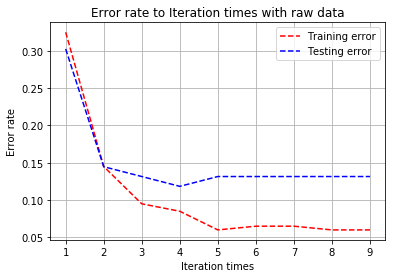

Minimum training error for raw data 0.06000 
Minimum testing error for raw data 0.13158 


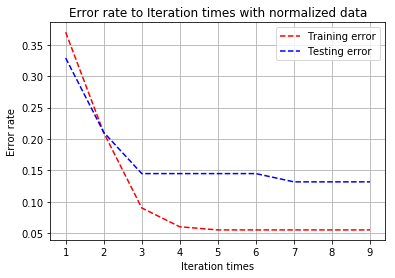

Minimum training error for normalized data 0.05500 
Minimum testing error for normalized data 0.13158 


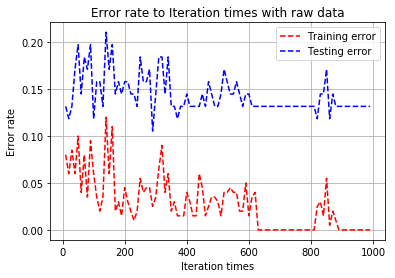

Minimum training error for raw data 0.00000 
Minimum testing error for raw data 0.10526 


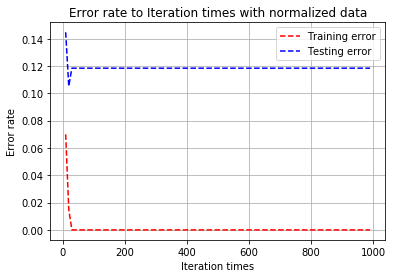

Minimum training error for normalized data 0.00000 
Minimum testing error for normalized data 0.10526 


In [869]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model 
from sklearn.linear_model import Perceptron
#-----------------------------------Put the data in the form-----------------------------------#
traindata = pd.read_csv('bclass-train.txt', sep="\t", header=None)
testdata  = pd.read_csv('bclass-test.txt', sep="\t", header=None)
feature_train = np.array(traindata.drop((0), axis = 1))
fearure_test  = np.array(testdata.drop((0), axis = 1))
label_train = np.array(traindata[0])
label_test = np.array(testdata[0])
#-----------------------------------Data preprocessing-----------------------------------#
feature_train_normalized = preprocessing.normalize(feature_train, norm = "l2")
fearure_test_normalized = preprocessing.normalize(fearure_test, norm = "l2")
data_raw = [feature_train, fearure_test]
data_normalized = [feature_train_normalized, fearure_test_normalized]
#-----------------------------------Logistic Regression-----------------------------------#
time_iter = range(1,10,1)
data_type = ["raw" , "normalized"]
for training , testing in data_raw , data_normalized :
    error_train = []
    error_test = []
    for times in time_iter :
        Logistic_Regression = linear_model.LogisticRegression(solver='newton-cg',multi_class='multinomial', penalty='l2',max_iter=times)
        Logistic_Regression.fit(training,label_train)
        error_train.append(1-Logistic_Regression.score(training,label_train))
        error_test.append(1-Logistic_Regression.score(testing,label_test))
    plt.title("Error rate to Iteration times with %s data" %(data_type[0]))
    plt.xlabel("Iteration times")
    plt.ylabel("Error rate")
    plt.plot(time_iter,error_train, 'r--', label = "Training error")
    plt.plot(time_iter,error_test, 'b--', label = "Testing error")
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.show()
    print "Minimum training error for %s data %.5f " %(data_type[0], error_train[-1])
    print "Minimum testing error for %s data %.5f " %(data_type[0], error_test[-1])
    del data_type[0]
#-----------------------------------Perceptron-----------------------------------#
time_iter = range(10,1000,10)
data_type = ["raw" , "normalized"]
for training , testing in data_raw , data_normalized :
    error_train = []
    error_test = []
    for times in time_iter :
        perceptron = Perceptron(penalty='l2', max_iter = times, alpha = pow(10,-7))
        perceptron.fit(training,label_train)
        error_train.append(1-perceptron.score(training,label_train))
        error_test.append(1-perceptron.score(testing,label_test))
    plt.title("Error rate to Iteration times with %s data" %(data_type[0]))
    plt.xlabel("Iteration times")
    plt.ylabel("Error rate")
    plt.plot(time_iter,error_train, 'r--', label = "Training error")
    plt.plot(time_iter,error_test, 'b--', label = "Testing error")
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.show()
    print "Minimum training error for %s data %.5f " %(data_type[0], min(error_train))
    print "Minimum testing error for %s data %.5f " %(data_type[0], min(error_test))
    del data_type[0]

Compute Wi for each training point

In [721]:
from numpy import linalg as LA
para_locally = [] # [[[wi]for each point]for each tou]
tou = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]
for each_tou in tou :
    temp_test = []
    for each_test_point in fearure_test :
        temp_wi = []
        for each_train_point in feature_train :
            wi = np.exp(-(pow(LA.norm(each_test_point-each_train_point),2)/(2*pow(each_tou,2))))
            temp_wi.append(wi)
        temp_test.append(temp_wi)
    para_locally.append(temp_test)

maximize l(b) to learn b

In [881]:
def sigmoid(x, theta) : 
    '''
    function : sigmoid generator
    input :
        x(numpy.array)(35) : vector of single test point
        theta(numpy.array)(35) : parameter
    output :
        sigmoid function 
    '''
    z = np.dot(x,theta)
    return 1.0 / (1.0 + np.exp(-z))
def log_likelihood(x ,y , w, theta) : 
    '''
    function : likelihood generator
    input :
        x(numpy.array)(200*35) : two dimension vector [[each feature]each test point]
        theta(numpy.array)(35) : parameter
        y(lust[int])(200) : label
        w(numpy.array)(200) : weight for specific test point 
    output :
        log_likelihood function
    '''
    lamda = 0.001
    temp = 0
    for i in range(len(x)) :
        func_sigmoid = sigmoid(x[i],theta)
        temp += w[i]*(y[i]*np.log(func_sigmoid)+(1-y[i])*np.log(1-func_sigmoid))
    return temp - lamda*np.dot(theta,theta.T)
def gradient(x ,y , w, theta) : 
    '''
    function : likelihood generator-
    input :
        x(numpy.array)(200*35) : two dimension vector [[each feature]each test point]
        theta(numpy.array)(35) : parameter
        y(lust[int])(200) : label
        w(numpy.array)(200) : weight for specific test point 
    output :
        gradient function
    '''
    lamda = 0.001
    temp_gradient = np.zeros(len(theta))
    for i in range(len(x)) :
        func_sigmoid = sigmoid(x[i],theta)
        temp_gradient += w[i]*x[i]*(y[i]-func_sigmoid)
    return temp_gradient -2*lamda*theta
def hessian(x ,y , w, theta) : 
    '''
    function : hessian generator
    input :
        x(numpy.array)(200*35) : two dimension vector [[each feature]each test point]
        theta(numpy.array)(35) : parameter
        y(lust[int])(200) : label
        w(numpy.array)(200) : weight for specific test point 
    output :
        hessian function
    '''
    lamda = 0.001
    temp_hessian = np.matrix(np.dot(np.zeros(len(theta)).reshape(len(theta),1),np.zeros(len(theta)).reshape(1,len(theta))))
    for i in range(len(x)) :
        func_sigmoid = sigmoid(x[i],theta)
        temp_hessian += np.matrix(-(w[i]*func_sigmoid*(1-func_sigmoid))*np.dot(x[i].reshape(len(theta),1),x[i].reshape(1,len(theta))))
    return temp_hessian - 2*lamda


In [882]:
new_col = [1 for i in range(len(fearure_test[0]))]
if len(fearure_test[0]) != 35 :
    fearure_test = np.insert(fearure_test,0,1,axis=1)
    feature_train = np.insert(feature_train,0,1,axis=1)

In [895]:
#w = para_locally[5][0]
#print sigmoid(feature_train[0],the)
#print log_likelihood(feature_train,label_train,para_locally[5][0],np.array(the))
#print gradient(feature_train,label_train,w,np.array(the))
#print hessian(feature_train,label_train,w,np.array(the))
#np.linalg.inv(hessian(feature_train,label_train,w,np.array(the)))  

def newtons_method(x, y, w) :
    the = np.zeros(35)
    l = log_likelihood(x, y, w, the)
    delta_l = np.Infinity
    stop = .0000000001 
    max_iterations = 1000
    count = 0
    rate = 1
    while abs(delta_l) > stop and count < max_iterations :                                       
        count += 1                                                                      
        g = gradient(x, y, w, the)    
        hess = hessian(x, y, w, the)  
        H_inv = np.linalg.inv(hess)   
        delta = np.dot(H_inv, g.T) * rate    
        the = the + np.squeeze(np.asarray(delta))  
        l_new = log_likelihood(x, y, w, the)                                                    
        delta_l = l - l_new     
        l = l_new 
    print count
    return the
print newtons_method(feature_train,label_train,para_locally[5][0])
'''
out = 0
for index in range(len(fearure_test)) :
    temp = 1 if sigmoid(fearure_test[i],newtons_method(feature_train,label_train,para_locally[5][index])) > 0.5 else 0
    add = 1 if (temp == label_test[index]) else 0
    out += add
print float(out)/len(fearure_test)
'''

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.8355131876344569
0.09771085536180672
0.14113960661125952
0.49312303680605846
0.35425671494587435
0.58823831709864
0.16206614103016379
0.6357679143654985
0.999554909970141
0.7532494146491755
0.984923

E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


'\nout = 0\nfor index in range(len(fearure_test)) :\n    temp = 1 if sigmoid(fearure_test[i],newtons_method(feature_train,label_train,para_locally[5][index])) > 0.5 else 0\n    add = 1 if (temp == label_test[index]) else 0\n    out += add\nprint float(out)/len(fearure_test)\n'

0.6931471805599453